### 一、环境配置
#### 1、系统环境
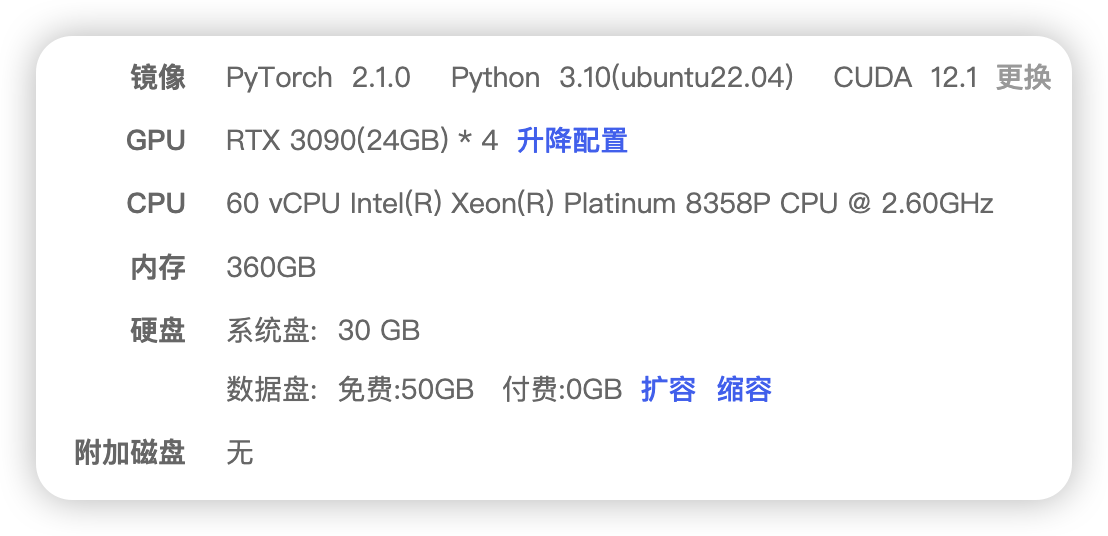

#### 2、python相关库

In [20]:
%pip install accelerate 
%pip install bitsandbytes 
%pip install peft 
%pip install swanlab 
%pip install sentencepiece 
%pip install trl 
%pip install deepspeed
%pip install modelscope --upgrade
%pip install addict
%pip install datasets

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
  Using cached http://mirrors.aliyun.com/pypi/packages/20/34/a08b0ee99715eaba118cbe19a71f7b5e2425c2718ef96007c325944a1152/datasets-3.6.0-py3-none-any.whl (491 kB)
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.0
    Uninstalling datasets-2.14.0:
      Successfully uninstalled datasets-2.1

In [19]:
%pip uninstall datasets==2.14.0

Found existing installation: datasets 2.14.0
Uninstalling datasets-2.14.0:
  Would remove:
    /root/miniconda3/bin/datasets-cli
    /root/miniconda3/lib/python3.10/site-packages/datasets-2.14.0.dist-info/*
    /root/miniconda3/lib/python3.10/site-packages/datasets/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


### 二、下载模型与数据集

#### 1、下载数据集

In [12]:
#数据集下载
!modelscope download --dataset FreedomIntelligence/medical-o1-reasoning-SFT --local_dir ./dir

Processing 6 items:   0%|                           | 0.00/6.00 [00:00<?, ?it/s]















Processing 6 items:  17%|███▎                | 1.00/6.00 [00:00<00:02, 2.24it/s]






























































































































































































Processing 6 items:  50%|██████████          | 3.00/6.00 [00:03<00:03, 1.28s/it]













































































Processing 6 items:  67%|█████████████▎      | 4.00/6.00 [00:04<00:02, 1.28s/it]










































































Processing 6 items:  83%|████████████████▋   | 5.00/6.00 [00:06<00:01, 1.32s/it]















Processing 6 items: 100%|████████████████████| 6.00/6.00 [00:06<00:00, 1.16s/it]


In [2]:
#学术加速 以及登录 hub
import subprocess
import os

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

from huggingface_hub import notebook_login

notebook_login()


In [3]:
#下载数据集
from datasets import load_dataset

ds = load_dataset("FreedomIntelligence/medical-o1-reasoning-SFT", "zh",cache_dir = './dir')

Generating train split: 0 examples [00:00, ? examples/s]

#### 2、下载模型

In [4]:
#模型下载
from modelscope import snapshot_download
model_dir = snapshot_download('Qwen/Qwen3-4B', cache_dir='/root/autodl-tmp', revision='master')
print(f"模型路径: {model_dir}")

2025-05-21 23:07:29,207 - modelscope - WARNING - Using branch: master as version is unstable, use with caution


2025-05-21 23:07:29,439 - modelscope - INFO - Got 12 files, start to download ...


Processing 12 items:   0%|          | 0.00/12.0 [00:00<?, ?it/s]

2025-05-21 23:10:56,387 - modelscope - INFO - Download model 'Qwen/Qwen3-4B' successfully.


模型路径: /root/autodl-tmp/Qwen/Qwen3-4B


### 三、多卡训练

In [ ]:
deepspeed train.py